<a href="https://colab.research.google.com/github/enrique-carbo/Data-Science/blob/main/Seccion11_RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística Dataset Titanic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ls

sample_data/


In [ ]:
entrenamiento = pd.read_csv('https://raw.githubusercontent.com/enrique-carbo/data/main/titanic_train.csv')
entrenamiento.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Mapa de calor de la matriz donde se obervan los valores NaN 

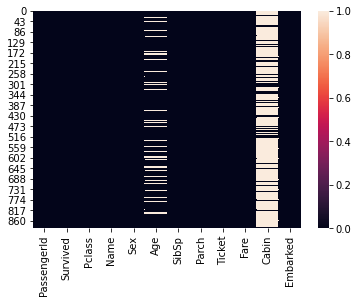

In [ ]:
sns.heatmap(entrenamiento.isnull())

In [ ]:
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Gráfico que muestra sobrevivientes en relación al sexo

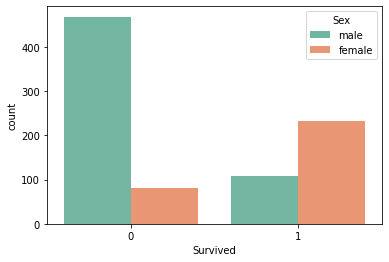

In [ ]:
sns.countplot(x='Survived', data=entrenamiento, hue='Sex', palette='Set2', )

### Gráfico que muestra sobreviviente de acuerdo a la clase del boleto (Ticket class)

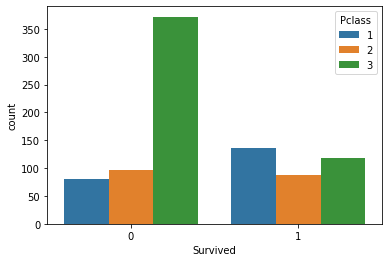

In [ ]:
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass')

### Distribución por edades 

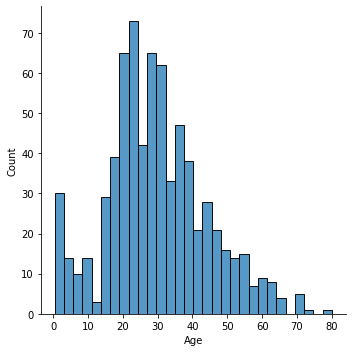

In [ ]:
sns.displot(entrenamiento['Age'].dropna(), bins=30)

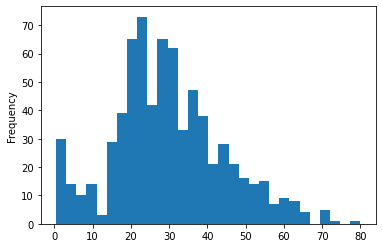

In [ ]:
entrenamiento['Age'].plot.hist(bins=30)

### Distribución en relación al número de familiares a bordo

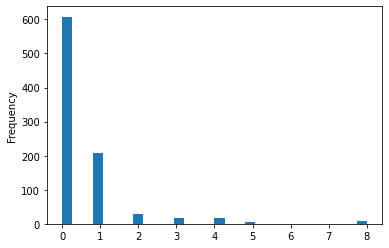

In [ ]:
entrenamiento['SibSp'].plot.hist(bins=30)

# Gráficos interactivos
[Ploty Express](https://plotly.com/python/plotly-express/)


In [ ]:
import plotly.express as px
#from IPython.display import HTML

In [ ]:
fig = px.histogram(data_frame=entrenamiento, x='Fare', width=1000, height=800)
fig.show()


### Limpieza de los datos  
En la variable edad 'age' vamos a reeemplazar los valores NAN por la media en relación a la clase del boleto 'Pclass'.

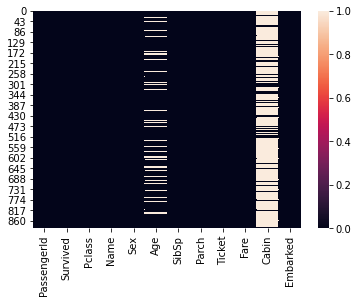

In [ ]:
sns.heatmap(entrenamiento.isnull())

Gráfico de cajas donde se calcula la edad media en relación a la clase del boleto 'Pclass'

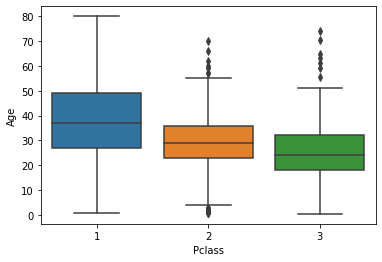

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

Creamos una función que toma la edad media de cada clase de boleto y la coloca en los lugares NaN

In [ ]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38
        elif clase == 2:
            return 30
        else:
            return 25
    else:
        return edad  

In [ ]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)

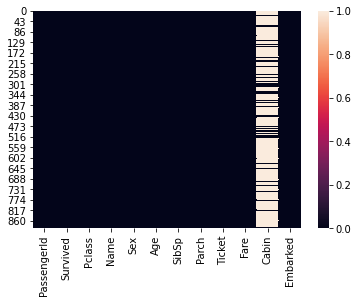

In [ ]:
sns.heatmap(entrenamiento.isnull())

Borrar columna 'Cabin'

In [ ]:
entrenamiento.drop('Cabin', axis=1, inplace=True )

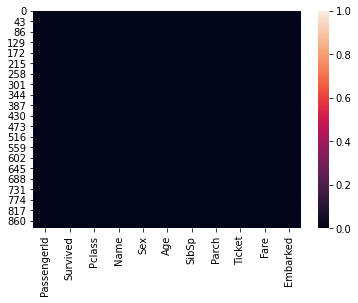

In [ ]:
sns.heatmap(entrenamiento.isnull())

In [ ]:
entrenamiento.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
entrenamiento.drop(['PassengerId', 'Name', 'Ticket'], inplace=True, axis=1)

In [ ]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
pd.get_dummies(entrenamiento['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)
sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

In [ ]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
entrenamiento.drop('Sex', inplace=True, axis=1)

In [ ]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [ ]:
puerto = pd.get_dummies(entrenamiento['Embarked'])
puerto

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [ ]:
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)

In [ ]:
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,0,1
887,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,25.0,1,2,23.4500,S,0,0,1
889,1,1,26.0,0,0,30.0000,C,1,0,0


In [ ]:
entrenamiento.drop('Embarked', inplace=True, axis=1)

In [ ]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Entrenamiento del modelo

In [ ]:
y = entrenamiento['Survived']
X = entrenamiento.drop('Survived', axis=1)
y.shape, X.shape 

((891,), (891, 8))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
650,3,25.0,0,0,7.8958,1,0,1
784,3,25.0,0,0,7.0500,1,0,1
125,3,12.0,1,0,11.2417,1,0,0
54,1,65.0,0,1,61.9792,1,0,0
446,2,13.0,0,1,19.5000,0,0,1


In [ ]:
y_test.head()

248    1
197    0
133    1
169    0
736    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicciones

In [ ]:
predicciones = modelo.predict(X_test)
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
y_test

248    1
197    0
133    1
169    0
736    0
      ..
422    0
815    0
466    0
559    1
6      0
Name: Survived, Length: 268, dtype: int64

## Métricas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       178
           1       0.73      0.78      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



In [ ]:
confusion_matrix(y_test, predicciones)

array([[152,  26],
       [ 20,  70]])